In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import tensorflow
import keras

In [2]:
nutrition = pd.read_pickle("./Nutrition_Full_Features.pkl")
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,Dutch Apple Pie,Baked Foods,2.80,500.0,0.560000,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,Bread White Wheat,Baked Foods,0.95,800.0,0.118750,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,Bagels Wheat,Baked Foods,1.60,450.0,0.355556,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [3]:
#Data for features
X = nutrition.iloc[:, 11:]
y = nutrition.iloc[:, 4]


In [4]:
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,273,9.22,6.58,41.05,4.30,2.2,1.898,279,6.04,126.0,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,309,9.49,7.42,48.39,4.41,2.6,2.275,299,6.59,138.0,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,290,11.50,2.17,44.54,22.02,1.6,2.313,14,0.91,76.0,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,238,2.15,10.66,43.91,5.00,9.2,0.630,684,4.89,127.0,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,250,1.53,10.20,48.89,6.12,4.1,0.000,20,2.76,165.0,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,241,10.16,1.66,40.60,19.10,2.9,1.507,4,0.78,572.0,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,19,0.27,1.39,3.78,0.71,3.1,0.053,62,0.90,327.0,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,96,6.84,5.23,4.32,1.89,1.2,1.486,70,1.15,269.0,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,208,15.70,1.22,17.17,11.23,2.3,2.452,30,0.49,309.0,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [5]:
y

1       0.264550
2       0.264550
5       0.560000
9       0.118750
10      0.355556
          ...   
1218    1.058824
1219    0.250000
1220    0.750000
1221    0.041000
1222    0.171429
Name: Price per Weight (£/100Gram), Length: 1042, dtype: float64

In [6]:
# command/
#only normalising X not y. Is this right?
# norm_X = preprocessing.normalize(X, axis=0) #collum instead of row
# norm_X = pd.DataFrame(norm_X, columns = X.columns)
# X=norm_X
# X

In [7]:
y = np.ravel(y)
X = X.values

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [9]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# Feature Scaling/preprocessing - normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building model
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(8, activation = 'relu', input_dim = 40))

# Adding the second hidden layer
model.add(Dense(units = 16, activation = 'relu'))

#avoids overfitting
#https://keras.io/api/layers/regularization_layers/dropout/
model.add(keras.layers.Dropout(0.1))


# Adding the output layer

model.add(Dense(units = 1))


# Compiling the ANN
history=model.compile(optimizer = 'adam', loss = 'mse', metrics=['mse'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
84/84 [==============================] - 1s 879us/step - loss: 47.4034 - mse: 47.4034
Epoch 2/100
84/84 [==============================] - 0s 854us/step - loss: 9.7790 - mse: 9.7790
Epoch 3/100
84/84 [==============================] - 0s 1ms/step - loss: 17.0433 - mse: 17.0433
Epoch 4/100
84/84 [==============================] - 0s 787us/step - loss: 104.1217 - mse: 104.1217
Epoch 5/100
84/84 [==============================] - 0s 807us/step - loss: 16.2942 - mse: 16.2942
Epoch 6/100
84/84 [==============================] - 0s 790us/step - loss: 21.6383 - mse: 21.6383
Epoch 7/100
84/84 [==============================] - 0s 731us/step - loss: 22.7509 - mse: 22.7509
Epoch 8/100
84/84 [==============================] - 0s 830us/step - loss: 167.1295 - mse: 167.1295
Epoch 9/100
84/84 [==============================] - 0s 997us/step - loss: 7.8212 - mse: 7.8212
Epoch 10/100
84/84 [==============================] - 0s 984us/step - loss: 62.5848 - mse: 62.5848
Epoch 11/100
84/84 [=

84/84 [==============================] - 0s 980us/step - loss: 6.9195 - mse: 6.9195
Epoch 84/100
84/84 [==============================] - 0s 878us/step - loss: 160.3186 - mse: 160.3186
Epoch 85/100
84/84 [==============================] - 0s 879us/step - loss: 19.9910 - mse: 19.9910
Epoch 86/100
84/84 [==============================] - 0s 907us/step - loss: 85.1940 - mse: 85.1940
Epoch 87/100
84/84 [==============================] - 0s 896us/step - loss: 153.9886 - mse: 153.9886
Epoch 88/100
84/84 [==============================] - 0s 824us/step - loss: 104.8660 - mse: 104.8660
Epoch 89/100
84/84 [==============================] - 0s 977us/step - loss: 88.9943 - mse: 88.9943
Epoch 90/100
84/84 [==============================] - 0s 1ms/step - loss: 18.9124 - mse: 18.9124
Epoch 91/100
84/84 [==============================] - 0s 1ms/step - loss: 13.0349 - mse: 13.0349
Epoch 92/100
84/84 [==============================] - 0s 1ms/step - loss: 18.9342 - mse: 18.9342
Epoch 93/100
84/84 [=====

Parameters involved:
    https://keras.io/api/models/model_training_apis/

In [10]:
#model evaluation
mse = model.evaluate(X_test, y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 5.6118 - mse: 5.6118


In [11]:
print('MSE without tuning: {}'.format(mse))

MSE without tuning: 5.611782550811768


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


https://keras.io/api/models/sequential/
The Sequential Class, provides a training and inference features on this model

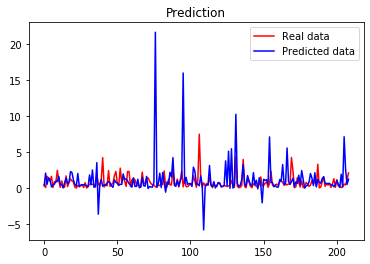

In [13]:
y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

cite: https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression

In [14]:
#Why are my errors all of a sudden so because of overfitting?
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0124326516671986
Mean Squared Error: 5.611782387048243
Root Mean Squared Error: 2.3689200887848125


In [15]:
import kerastuner
from kerastuner import HyperModel

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=32, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid']),#,'softmax']),
        input_dim = 40
        )
             
    )

    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=32, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid'])#,'softmax'])
        )
             
    )
    
    model.add(
        keras.layers.Dropout(
            hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    step=0.01)
        )
    )

    # Adding the output layer
    model.add(Dense(units = 1))


    model.compile(
        optimizer='adam',
        #optimizer = hp.Choice('dense_optimizer',
                #values=['adam','SGD','rmsprop','adadelta'] ),
        loss = 'mse',
        metrics = ['mse']
    )
    return model

In [16]:
tuner_rs = kerastuner.tuners.RandomSearch(
            build_model,
            objective='mse',
            max_trials=5,
            executions_per_trial=2, overwrite=True)

In [17]:
tuner_rs.search(X_train, y_train, epochs=10) #, verbose=0)

Trial 5 Complete [00h 00m 02s]
mse: 63.07194709777832

Best mse So Far: 62.40811347961426
Total elapsed time: 00h 00m 10s
INFO:tensorflow:Oracle triggered exit


In [24]:
#best_model = tuner_rs.get_best_models(num_models=1)
best_model = tuner_rs.get_best_models(num_models=1)[0]
mse_rs = best_model.evaluate(X_test, y_test)[1]

7/7 [==============================] - 0s 979us/step - loss: 1.3827 - mse: 1.3827


In [25]:
loss, mse = best_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 804us/step - loss: 1.6133 - mse: 1.6133


In [26]:
tuner_rs.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='mse', direction='min')
Trial summary
Hyperparameters:
units: 20
dense_activation: relu
dropout: 0.09
Score: 62.40811347961426
Trial summary
Hyperparameters:
units: 20
dense_activation: tanh
dropout: 0.08
Score: 62.55263328552246
Trial summary
Hyperparameters:
units: 32
dense_activation: sigmoid
dropout: 0.08
Score: 62.96870231628418
Trial summary
Hyperparameters:
units: 20
dense_activation: sigmoid
dropout: 0.09
Score: 63.0499153137207
Trial summary
Hyperparameters:
units: 12
dense_activation: relu
dropout: 0.09
Score: 63.07194709777832
